In [1]:
# importing necessary libraries
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping


importing the data set and splitting into train and test the dataset

In [2]:

# Define paths
altered_path = "SOCOFing/Altered"
real_path = "SOCOFing/Real"

# Initialize ImageDataGenerator with some preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Prepare training and test data generators
train_gen = datagen.flow_from_directory(
    'SOCOFing',
    classes=['Real', 'Altered'],
    target_size=(80, 80),
    batch_size=32,
    class_mode='binary',
    subset='training'
)


val_gen = datagen.flow_from_directory(
    'SOCOFing',
    classes=['Real', 'Altered'],
    target_size=(80, 80),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 18454 images belonging to 2 classes.
Found 4613 images belonging to 2 classes.


In [3]:
# building the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(80, 80, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


c:\Users\Image\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 78, 78, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,288,577 (16.36 MB)

 Trainable params: 4,288,577 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# this is training the model
# Define the EarlyStopping callback
early_stopper = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=3,          # Number of epochs with no improvement after which training will be stopped
    verbose=1,           # Log level
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity.
)

# Fit the model with the EarlyStopping callback
history = model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // 32,
    validation_data=val_gen,
    validation_steps=val_gen.samples // 32,
    epochs=15,
    callbacks=[early_stopper]  # Add the callback to the callbacks list
)

Epoch 1/15


c:\Users\Image\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


576/576 ━━━━━━━━━━━━━━━━━━━━ 257s 438ms/step - accuracy: 0.8438 - loss: 0.3586 - val_accuracy: 0.9722 - val_loss: 0.0892
Epoch 2/15
  1/576 ━━━━━━━━━━━━━━━━━━━━ 2:02 213ms/step - accuracy: 0.9375 - loss: 0.1785

c:\Users\Image\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 564us/step - accuracy: 0.9375 - loss: 0.1785 - val_accuracy: 1.0000 - val_loss: 0.0206
Epoch 3/15
576/576 ━━━━━━━━━━━━━━━━━━━━ 81s 140ms/step - accuracy: 0.9704 - loss: 0.0811 - val_accuracy: 0.9727 - val_loss: 0.0712
Epoch 4/15
576/576 ━━━━━━━━━━━━━━━━━━━━ 0s 87us/step - accuracy: 1.0000 - loss: 0.0240 - val_accuracy: 0.8000 - val_loss: 0.4634
Epoch 5/15
576/576 ━━━━━━━━━━━━━━━━━━━━ 54s 93ms/step - accuracy: 0.9835 - loss: 0.0506 - val_accuracy: 0.9852 - val_loss: 0.0458
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


In [5]:
model.save('my_model.h5')


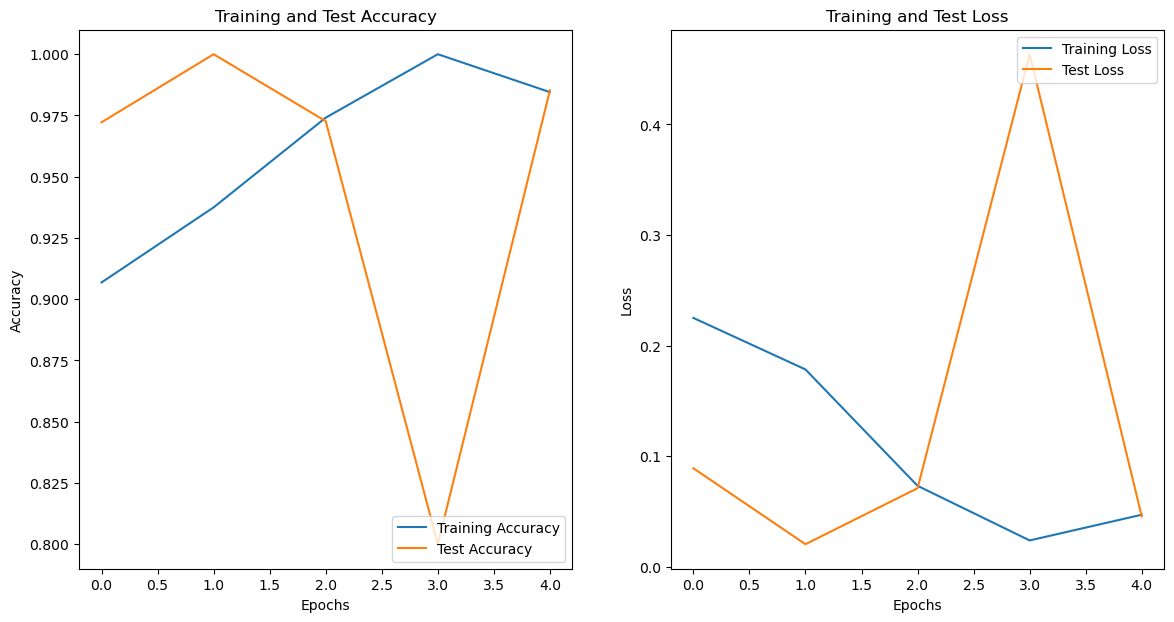

In [6]:
# Access the history data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Determine the number of epochs actually run
epochs_range = range(len(acc))

# Plotting
plt.figure(figsize=(14, 7))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

In [7]:
# Get the history of validation accuracy
test_acc = history.history['val_accuracy']

# Print validation accuracy for each epoch
for i, accuracy in enumerate(test_acc, 1):
    print(f"Epoch {i}: Validation Accuracy = {accuracy * 100:.2f}%")

# Print the final validation accuracy
final_val_accuracy = test_acc[-1]
print(f"Final Validation Accuracy: {final_val_accuracy * 100:.2f}%")


Epoch 1: Validation Accuracy = 97.22%
Epoch 2: Validation Accuracy = 100.00%
Epoch 3: Validation Accuracy = 97.27%
Epoch 4: Validation Accuracy = 80.00%
Epoch 5: Validation Accuracy = 98.52%
Final Validation Accuracy: 98.52%


In [8]:
#not necessary
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

In [9]:
#not necessary
model = load_model('my_model.h5')

In [10]:
#not necessary
# Load and preprocess the image
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(80, 80))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)  # Model expects a batch of images, so add an extra dimension
    img /= 255.0  # Rescale the image
    return img

#image_path = 'aws.png'
image_path = 'real.jpg'
img = load_and_preprocess_image(image_path)


In [11]:
#not necessary
# Predict the class
prediction = model.predict(img)
predicted_class = int(prediction[0][0] > 0.5)  # Since we're using a sigmoid activation, >0.5 will be considered class 1 (spoof)

# Print the prediction
class_labels = {0: 'Real', 1: 'Spoof'}
print(f'The fingerprint is predicted as: {class_labels[predicted_class]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
The fingerprint is predicted as: Real
